In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

In [3]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [4]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [5]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress',"Coat",'Sandal','Shirt','Sneaker','Bag','Ankle boot']

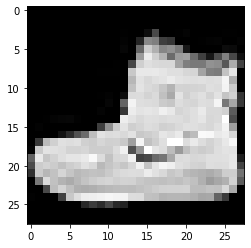

In [7]:
plt.imshow(xtrain[0],cmap='gray')

In [8]:
xtrain=xtrain/255.0

In [9]:
xtest=xtest/255.0

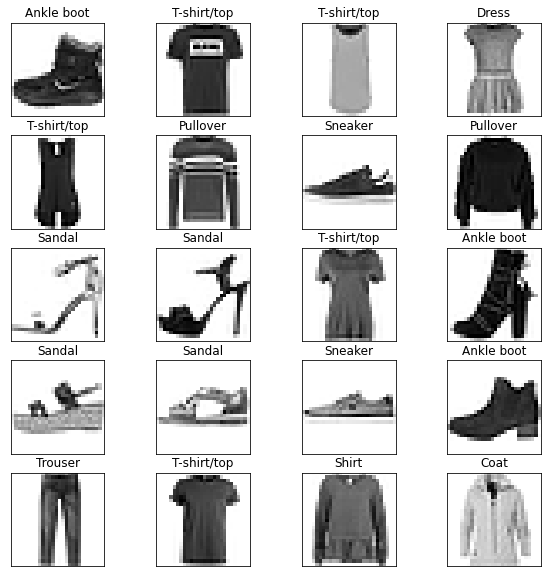

In [10]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(xtrain[i],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[ytrain[i]])

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)    

])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6336 - accuracy: 0.7831
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3875 - accuracy: 0.8627
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.8761
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3135 - accuracy: 0.8844
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8918
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.8953
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.9009
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9070
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2447 - accuracy: 0.9086
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.244

In [14]:
train_loss,train_acc=model.evaluate(xtrain,ytrain)
print("Trainning Accuracy is {} and loss is {}".format(train_acc,train_loss))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9459
Trainning Accuracy is 0.9458500146865845 and loss is 0.14471913874149323


In [15]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Testing Accuracy is {} and loss is {}".format(test_acc,test_loss))

313/313 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8905
Testing Accuracy is 0.890500009059906 and loss is 0.3655390739440918


In [16]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [17]:
pred=probability_model.predict(xtest)

In [18]:
pred[0]

array([2.7373801e-11, 2.8369751e-09, 2.5973407e-11, 4.3136796e-15,
       4.1453941e-12, 3.3899389e-06, 1.1782451e-10, 5.4487773e-05,
       2.8851474e-10, 9.9994206e-01], dtype=float32)

In [19]:
np.argmax(pred[0])

9

In [20]:
class_names[9]

'Ankle boot'

In [21]:
ytest[0]

9

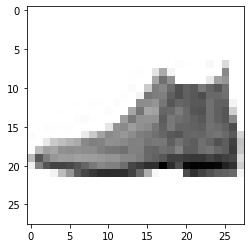

In [23]:
plt.imshow(xtest[0],cmap=plt.cm.binary)

In [32]:
def plot_image(i,pred,ytest,xtest):
    img=xtest[i]
    actual=ytest[i]
    predicted=np.argmax(pred[i])
    plt.imshow(img,cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if actual==predicted:
        color='g'
    else:
        color='r'
    plt.xlabel("{} with {:.2f} % accuracy".format(class_names[predicted],100*np.max(pred[i])),color=color)    

In [33]:
def plot_acc(i,pred,ytest):
  actual=ytest[i]
  predicted=np.argmax(pred[i])
  plt.ylim([0,1])
  bplot=plt.bar(range(10),pred[i],color='#777777')
  bplot[predicted].set_color('r')
  bplot[actual].set_color('g')
  plt.xticks(range(10))
  plt.yticks([])

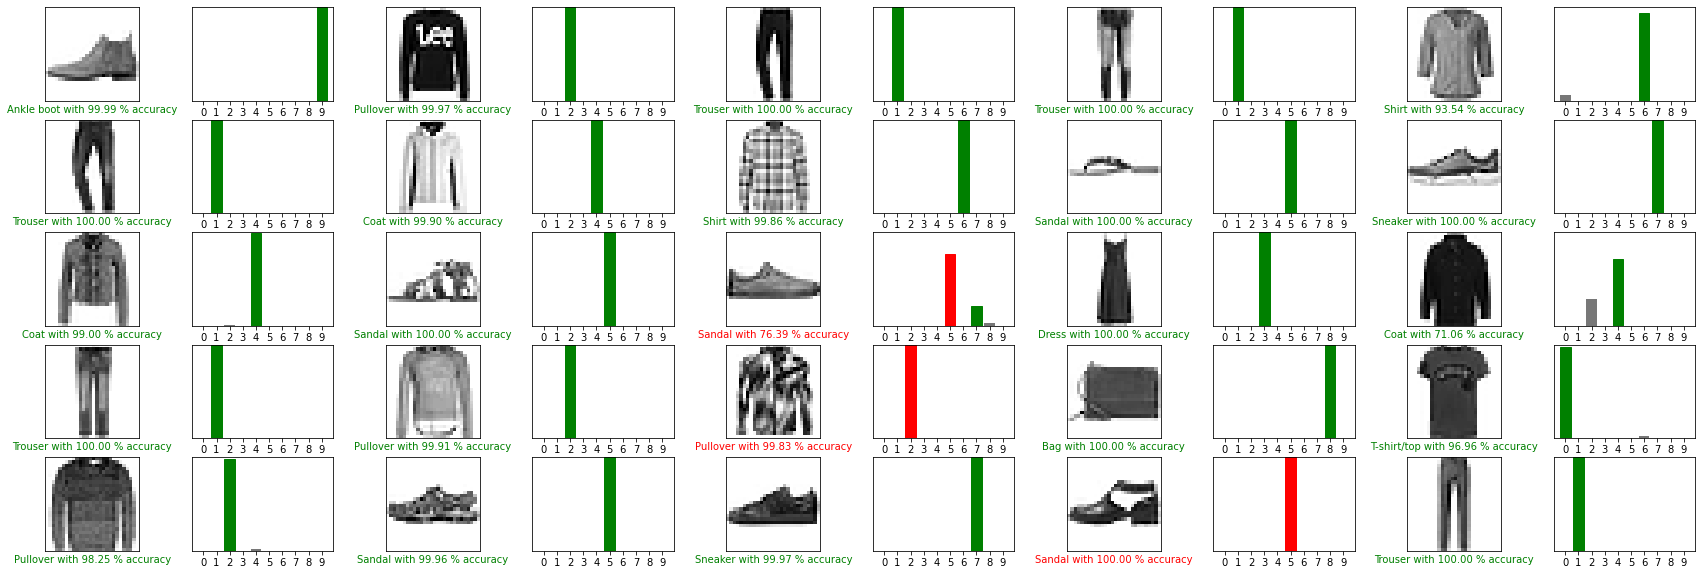

In [34]:
r=5
c=5
n=r*c
plt.figure(figsize=(3*2*c,2*r))
for i in range(n):
  plt.subplot(r,2*c,2*i+1)
  plot_image(i,pred,ytest,xtest)
  plt.subplot(r,2*c,2*i+2)
  plot_acc(i,pred,ytest)